In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925}
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:,.4f}'.format

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
early_stopping_exps = {'2': exp_filepaths.TRAIN_BATCH_SIZE_2,
                       '6': exp_filepaths.TRAIN_BATCH_SIZE_6,
                       '12': exp_filepaths.TRAIN_BATCH_SIZE_12,
                       '24': exp_filepaths.TRAIN_BATCH_SIZE_24,
                       '35': exp_filepaths.ARCH_UNET_RAW}
ordered_keys = ['2', '6', '12', '24', '35']
cpal = sns.color_palette("muted", 8)

In [3]:
def linear_smoothing(vals, weight=0.6):
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [np.nan]
    a.extend(info)
    return a

Text(0,0.5,'Validation Loss')

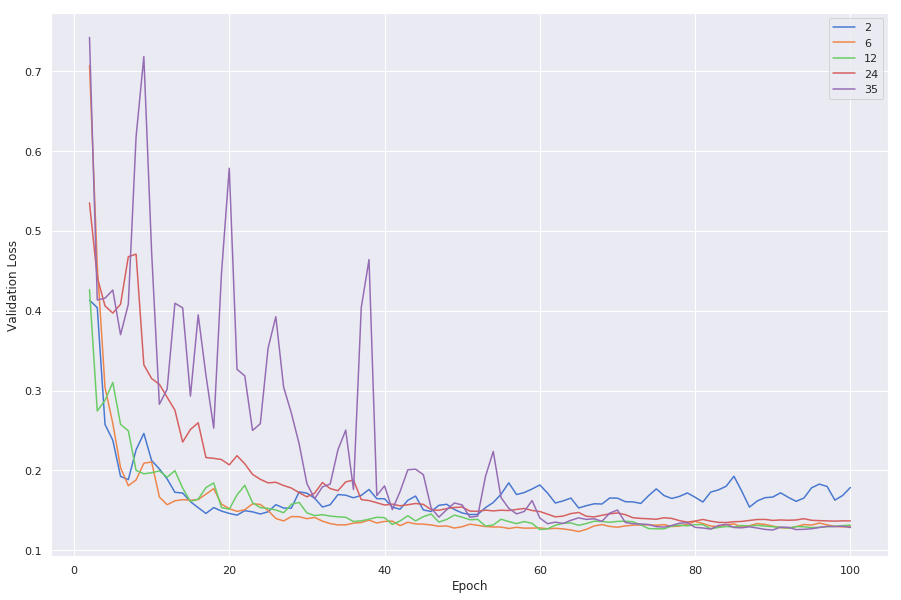

In [4]:
# plot validation losses
fig, ax = plt.subplots(1,1, figsize=(15, 10))

count = 0
for k in ordered_keys:
    exp_filepath = early_stopping_exps[k]
    # load pik file
    ind = exp_filepath.find('test_results')
    base_folder = exp_filepath[:ind]
    pik_path = os.path.join(base_folder, 'pik_data.dat')
    data = io_utils.load_pik(pik_path)
    epochs = data[0]
    val_loss = data[2]
    y = linear_smoothing(val_loss)
    ax.plot(epochs, y, color=cpal[count], linestyle='-')
    
    count += 1

ax.legend(ordered_keys)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')

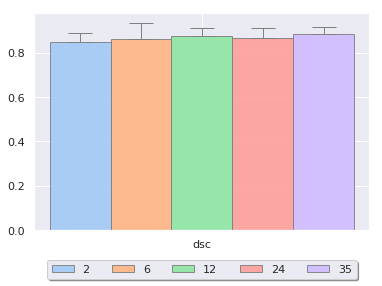

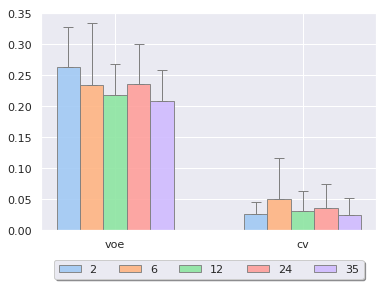

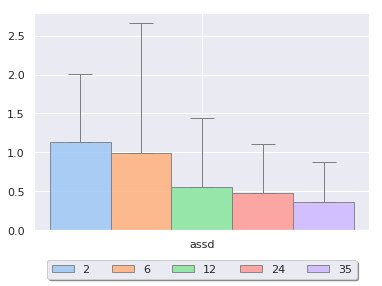

,2,6,12,24,35
dsc,$0.8466\pm0.044$,$0.8631\pm0.071$,$0.8765\pm0.033$,$0.8648\pm0.045$,$0.883\pm0.033$
voe,$0.2635\pm0.065$,$0.2345\pm0.1$,$0.2183\pm0.05$,$0.2357\pm0.065$,$0.208\pm0.05$
cv,$0.0254\pm0.02$,$0.0504\pm0.065$,$0.0313\pm0.032$,$0.0357\pm0.039$,$0.0244\pm0.027$
assd,$1.1287\pm0.875$,$0.9963\pm1.669$,$0.5502\pm0.894$,$0.4734\pm0.638$,$0.3544\pm0.518$


In [5]:
# plot validation losses
def plot_metrics(metrics):
    count = 0
    t_mean = []
    t_error = []

    for m in metrics:
        m_mean = []
        m_error = []
        for k in ordered_keys:
            exp_filepath = early_stopping_exps[k]
            metrics_path = os.path.join(exp_filepath, 'metrics.dat')
            data = io_utils.load_pik(metrics_path)[m]

            m_mean.append(np.mean(data))
            m_error.append(np.std(data))

        t_mean.append(m_mean)
        t_error.append(m_error)

    exp_means = pd.DataFrame(t_mean, index=metrics, columns=ordered_keys)
    exp_stds = pd.DataFrame(t_error, index=metrics, columns=ordered_keys)
    
    af.display_bar_graph(exp_means, exp_stds)
    
    df1 = exp_means.round(4).astype(str)
    df2 = exp_stds.round(3).astype(str)
    
    return '$'+df1 + '\pm' + df2 +'$'

dfs = []
dfs.append(plot_metrics(['dsc']))
dfs.append(plot_metrics(['voe', 'cv']))
dfs.append(plot_metrics(['assd']))

df = pd.concat(dfs, axis=0)
df.style.set_properties(**{'width': '300px'})
display(df)

[array([0.8318614 , 0.8581256 , 0.82340365, 0.86671093, 0.87970853,
        0.89025761, 0.85727386, 0.88171964, 0.9054959 , 0.90145732,
        0.74134189, 0.81087688, 0.75756478, 0.79033686, 0.8611702 ,
        0.84430477, 0.84797765, 0.78060479, 0.87100514, 0.80008589,
        0.90683761, 0.89192238, 0.85377727, 0.87757697, 0.85279515,
        0.8739182 , 0.86466472, 0.78250568]),
 array([0.88987628, 0.90109512, 0.87625622, 0.77788205, 0.92165918,
        0.91798109, 0.91082772, 0.89168223, 0.92048493, 0.91625387,
        0.86664117, 0.88324287, 0.83370445, 0.8826649 , 0.88218505,
        0.88379733, 0.89383483, 0.84301893, 0.75988072, 0.76761237,
        0.9154221 , 0.90196014, 0.90108329, 0.90957731, 0.68707479,
        0.89314959, 0.63451731, 0.90445136]),
 array([0.89356895, 0.9051333 , 0.86488849, 0.80130259, 0.915172  ,
        0.91261275, 0.89994132, 0.89165189, 0.79990877, 0.79376307,
        0.85271998, 0.86460768, 0.83680009, 0.87124558, 0.87738248,
        0.8667409 , 0.87

[array([0.28787441, 0.24849388, 0.30018171, 0.23522519, 0.2147503 ,
        0.19777993, 0.24979938, 0.21153973, 0.17268843, 0.17940619,
        0.41100614, 0.31808837, 0.39025813, 0.34664714, 0.24381133,
        0.26943995, 0.26392257, 0.35984266, 0.22851275, 0.33321403,
        0.17044566, 0.19507229, 0.25513843, 0.21814062, 0.2566322 ,
        0.22393009, 0.23840585, 0.35728186]),
 array([0.198399  , 0.18000625, 0.22023487, 0.36349675, 0.14529882,
        0.15160347, 0.16374321, 0.19546338, 0.14731628, 0.15454935,
        0.23533382, 0.20910031, 0.2851688 , 0.21002669, 0.21079509,
        0.2082107 , 0.19195175, 0.27136324, 0.3872519 , 0.37713398,
        0.15596464, 0.1785725 , 0.18002586, 0.16584888, 0.47668398,
        0.19307109, 0.53531648, 0.17443067]),
 array([0.19238624, 0.17329361, 0.23805856, 0.33152221, 0.15638976,
        0.16072886, 0.18191516, 0.19551279, 0.33346004, 0.34195094,
        0.25674642, 0.23849434, 0.28060509, 0.2281354 , 0.21844932,
        0.23517853, 0.21

[array([0.0351317 , 0.03532163, 0.01853731, 0.00703206, 0.02229221,
        0.02633668, 0.05861801, 0.02692152, 0.01032465, 0.01095032,
        0.04147099, 0.01590969, 0.01054169, 0.00043687, 0.0175559 ,
        0.02695625, 0.00424233, 0.01082687, 0.01851103, 0.0702868 ,
        0.01285178, 0.00167041, 0.05747861, 0.0288592 , 0.01217622,
        0.0440214 , 0.00922375, 0.07729306]),
 array([0.02482854, 0.01947696, 0.0145661 , 0.09827575, 0.03081122,
        0.00241982, 0.01686224, 0.0293464 , 0.0056929 , 0.00060532,
        0.03010941, 0.00676056, 0.11107919, 0.05637775, 0.03029306,
        0.01788968, 0.00315671, 0.02641753, 0.10453634, 0.1465482 ,
        0.02165308, 0.01864169, 0.02715174, 0.01969974, 0.22537351,
        0.03341394, 0.27006021, 0.01891766]),
 array([0.02971293, 0.0015987 , 0.00696222, 0.06411105, 0.0253684 ,
        0.01723664, 0.01881885, 0.0270947 , 0.12053372, 0.12189306,
        0.00490153, 0.01631976, 0.09271306, 0.06365789, 0.0158194 ,
        0.00998278, 0.02

[array([1.92570613, 1.6505975 , 1.6642856 , 0.27900144, 0.61064022,
        0.67805139, 1.34608869, 0.19402631, 0.19330161, 0.20747242,
        2.45855208, 1.69208208, 2.14832817, 1.8746232 , 0.20649863,
        1.38990476, 0.37468908, 1.66528492, 0.64318255, 2.72647029,
        0.29575974, 0.25334967, 0.71685059, 0.25262691, 1.63327531,
        0.25075074, 0.97114681, 3.30085236]),
 array([0.25157021, 0.20863143, 0.2552362 , 4.0479143 , 0.14152182,
        0.13653323, 0.2134236 , 0.90697332, 0.15188361, 0.15478997,
        0.2055565 , 0.21275764, 0.34692921, 0.21527979, 0.18215692,
        0.18654247, 0.20846162, 0.34786695, 3.56040378, 4.2706312 ,
        0.16355621, 0.18538908, 0.17199525, 0.16158315, 4.83807875,
        0.20636413, 5.76825422, 0.1965691 ]),
 array([0.25379665, 0.24115741, 0.24852526, 2.40690552, 0.1547315 ,
        0.14907152, 0.1558024 , 0.17177212, 3.45104159, 3.32387344,
        0.25055245, 0.23170818, 0.33064413, 0.24743221, 0.17774572,
        0.22537745, 0.30

[array([0.80362856, 0.82884929, 0.80841775, 0.87284886, 0.89976631,
        0.91433825, 0.80980472, 0.8586047 , 0.91494236, 0.91143786,
        0.71182193, 0.79817812, 0.76563588, 0.78999174, 0.84631242,
        0.82214288, 0.85159038, 0.77224381, 0.88743243, 0.74754345,
        0.91864382, 0.89341475, 0.80737072, 0.85296119, 0.84253624,
        0.91416085, 0.85676216, 0.72636287]),
 array([0.86831724, 0.91899434, 0.88920852, 0.70827572, 0.9509594 ,
        0.92020783, 0.89572381, 0.8662606 , 0.92575516, 0.91569958,
        0.89354529, 0.88925473, 0.93788382, 0.93540069, 0.85624671,
        0.86826436, 0.89102213, 0.82132165, 0.68796354, 0.66949856,
        0.93568251, 0.9190936 , 0.87726404, 0.89200503, 0.56070642,
        0.9240249 , 0.49959624, 0.92189139]),
 array([0.86778453, 0.90368858, 0.87095225, 0.75302535, 0.93899274,
        0.92861902, 0.88331829, 0.86813016, 0.71386408, 0.70752116,
        0.8569202 , 0.87895197, 0.92231031, 0.93047784, 0.86371897,
        0.85817394, 0.85

[array([0.86215019, 0.88954581, 0.83895563, 0.86065873, 0.86052552,
        0.86741284, 0.91065462, 0.90611359, 0.89624251, 0.891693  ,
        0.77341623, 0.82398624, 0.74966207, 0.79068229, 0.87655898,
        0.86769456, 0.84439544, 0.78914881, 0.85517497, 0.86057281,
        0.89533101, 0.89043499, 0.90584391, 0.90365576, 0.86330696,
        0.83706924, 0.87271441, 0.8480544 ]),
 array([0.91253315, 0.88387983, 0.86367583, 0.86266067, 0.89411054,
        0.9157651 , 0.92644974, 0.91864103, 0.91527436, 0.91680883,
        0.84130982, 0.87731175, 0.75035556, 0.83555802, 0.90974398,
        0.89989619, 0.89666534, 0.8658937 , 0.84858913, 0.89942088,
        0.8960205 , 0.88545378, 0.9262321 , 0.92785583, 0.8869756 ,
        0.8642709 , 0.86927349, 0.88765893]),
 array([0.92093255, 0.90658265, 0.85890859, 0.85619409, 0.89252995,
        0.89714891, 0.91720201, 0.91648374, 0.90953887, 0.90394807,
        0.84856074, 0.85072406, 0.76580039, 0.81910319, 0.89148524,
        0.87548062, 0.89

dsc
F-value: 16.2113
p-value: 0.0027
Dunn: 


,2,6,12,24,35
2,-1,0.0243605,0.0689863,1,0.0033324
6,0.0243605,-1,1,1,1
12,0.0689863,1,-1,1,1
24,1,1,1,-1,0.434161
35,0.0033324,1,1,0.434161,-1



voe
F-value: 16.2113
p-value: 0.0027
Dunn: 


,2,6,12,24,35
2,-1,0.0243605,0.0689863,1,0.0033324
6,0.0243605,-1,1,1,1
12,0.0689863,1,-1,1,1
24,1,1,1,-1,0.434161
35,0.0033324,1,1,0.434161,-1



cv
F-value: 4.5725
p-value: 0.3340

assd
F-value: 24.4432
p-value: 0.0001
Dunn: 


,2,6,12,24,35
2,-1,0.000907164,0.00145368,0.404292,0.000492543
6,0.000907164,-1,1,0.622051,1
12,0.00145368,1,-1,0.802021,1
24,0.404292,0.622051,0.802021,-1,0.444523
35,0.000492543,1,1,0.444523,-1



precision
F-value: 12.7146
p-value: 0.0128
Dunn: 


,2,6,12,24,35
2,-1,0.0553405,0.0593919,1,0.0312269
6,0.0553405,-1,1,1,1
12,0.0593919,1,-1,1,1
24,1,1,1,-1,1
35,0.0312269,1,1,1,-1



recall
F-value: 11.8690
p-value: 0.0184
Dunn: 


,2,6,12,24,35
2,-1,0.0479773,0.179992,1,0.0277486
6,0.0479773,-1,1,1,1
12,0.179992,1,-1,1,1
24,1,1,1,-1,1
35,0.0277486,1,1,1,-1


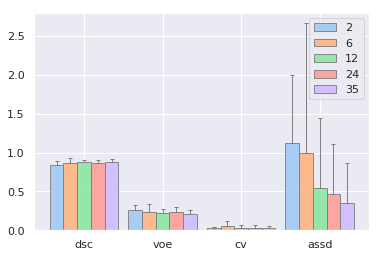

In [6]:
BS = {'filename': 'batch_size',
        'keys': ordered_keys}
BS.update(early_stopping_exps)
stats.kruskal_dunn_analysis([BS[k] for k in BS['keys']], BS['keys'], 'stats-batch_size')
stats.compare_metrics_v2([BS[k] for k in BS['keys']], BS['keys'], 'stats-batch_size')